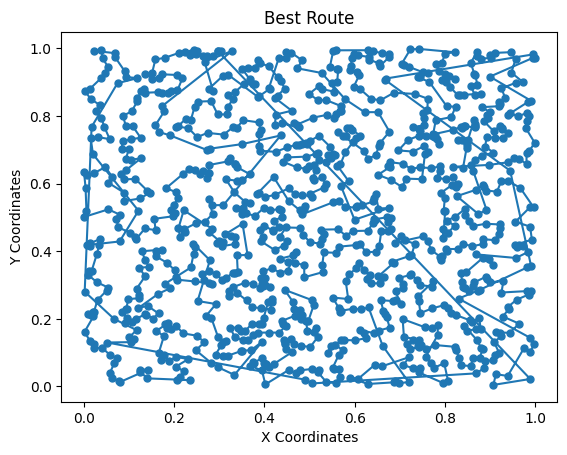

Best Route: [871, 199, 878, 814, 744, 606, 493, 983, 209, 652, 539, 359, 399, 68, 910, 840, 121, 730, 466, 565, 790, 268, 833, 436, 608, 517, 997, 67, 252, 266, 505, 156, 189, 384, 818, 289, 902, 330, 885, 57, 168, 622, 27, 900, 960, 52, 944, 581, 812, 439, 591, 114, 863, 178, 143, 767, 123, 142, 4, 370, 474, 728, 416, 645, 47, 807, 968, 228, 940, 985, 145, 88, 694, 247, 779, 705, 858, 172, 63, 746, 443, 533, 158, 620, 678, 256, 703, 498, 391, 949, 961, 554, 677, 441, 881, 810, 576, 329, 261, 963, 437, 139, 244, 519, 550, 685, 71, 761, 896, 634, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 637, 233, 866, 939, 93, 824, 376, 770, 691, 53, 729, 267, 160, 346, 340, 759, 775, 450, 48, 593, 999, 943, 29, 783, 444, 794, 471, 975, 486, 456, 489, 140, 712, 825, 490, 611, 992, 16, 381, 791, 35, 241, 786, 508, 717, 159, 26, 74, 500, 704, 250, 607, 251, 892, 638, 72, 136, 916, 934, 923, 781, 979, 701, 185, 147, 81, 510, 217, 432, 973, 183, 325, 245, 165, 595, 198, 816, 483, 458, 695, 752,

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Nearest neighbor algorithm for generating an initial route
def nearest_neighbor_initial_route():
    current_city = random.randint(0, num_cities - 1)  # Start from a random city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    route.append(route[0])  # Return to the starting city
    return route
# Calculate the total distance of a route (including return to start)
def total_distance(route):
    total = 0
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[i+1]])
    total += distance(cities[route[-1]], cities[route[0]])
    return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
    current_route = initial_route()
    best_route = current_route
    temp = initial_temp

    for i in range(num_iterations):
        new_route = current_route.copy()
        # Perform a random swap of two cities
        index1, index2 = random.sample(range(num_cities), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]

        current_energy = total_distance(current_route)
        new_energy = total_distance(new_route)

        # Acceptance probability
        if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
            current_route = new_route

        # Update best route
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route

        # Cool the temperature
        temp *= cooling_rate

    return best_route

# Set initial parameters
initial_temp=60000
cooling_rate=0.99
num_iterations=30

# Find the best route using Simulated Annealing with nearest neighbor initial route
best_route = simulated_annealing(nearest_neighbor_initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

with open("best_route.txt", "w") as f:
    f.write("Distance: {}".format(best_distance))

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.savefig('best_routeSA.png')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)
#28.1

In [2]:

route_length = len(best_route)
print("Length of the route:", route_length)

# Assuming 'best_route' is a list containing the optimal route points
print("First CETIS:", best_route[0])
print("Second CETIS:", best_route[-1])



Length of the route: 1001
First CETIS: 871
Second CETIS: 871


# Comparing betweeb PSO and Simulated annealing 

In [3]:
# PSO 

# Calculate Euclidean distance between two cities to use it to calc the total distance later on 
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# function that find the nearest neighbor for a city 
def nearest_neighbor_initial_route(cities, start_city):
    num_cities = len(cities)
    current_city = start_city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city
    
    return route

def total_distance(route, cities):
    total = 0
    num_cities = len(route)
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[(i+1) % num_cities]])
    total += distance(cities[route[-1]], cities[route[0]])
    return total

class Particle:
    def __init__(self, initial_route):
        self.position = initial_route
        self.velocity = [0] * len(initial_route)
        self.best_position = initial_route
        self.best_fitness = total_distance(initial_route, cities)


def initialize_particles(num_particles):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
        initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def initialize_particles(num_particles, initialization_approach='random'):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        if initialization_approach == 'random':
            initial_route = random.sample(range(num_cities), num_cities)
        elif initialization_approach == 'nearest_neighbor':
            start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
            initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        else:
            raise ValueError("Invalid initialization approach. Choose from 'random' or 'nearest_neighbor'.")

        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight):
    for i in range(len(particle.position)):
        cognitive_component = cognitive_weight * random.random() * (particle.best_position[i] - particle.position[i])
        social_component = social_weight * random.random() * (global_best_position[i] - particle.position[i])
        particle.velocity[i] = inertia_weight * particle.velocity[i] + cognitive_component + social_component


def update_position(particle):
    num_cities = len(particle.position)
    for i in range(num_cities):
        # Update position based on velocity
        particle.position[i] = (particle.position[i] + int(round(particle.velocity[i]))) % num_cities


def crowding_penalty(particles, crowding_factor):
    num_particles = len(particles)
    num_dimensions = len(particles[0].position)
    
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance_ij = sum((particles[i].position[d] - particles[j].position[d]) ** 2 for d in range(num_dimensions)) ** 0.5
            crowding_penalty_ij = max(0, 1 - distance_ij / crowding_factor)
            
            # Reduce fitness of particles based on crowding penalty
            particles[i].fitness *= crowding_penalty_ij
            particles[j].fitness *= crowding_penalty_ij

def pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight, crowding_factor,intia_type):
    particles = initialize_particles(num_particles,intia_type)
    global_best_position = min(particles, key=lambda p: p.best_fitness).best_position
    global_best_fitness = total_distance(global_best_position, cities)

    for _ in range(max_iterations):
        # Evaluate fitness
        for particle in particles:
            particle.fitness = 1 / (total_distance(particle.position, cities) + 1)  # Add 1 to avoid division by zero
        
        # Apply crowding penalty
        crowding_penalty(particles, crowding_factor)
        
        for particle in particles:
            update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight)
            update_position(particle)
            current_fitness = total_distance(particle.position, cities)

            # Update personal best if necessary
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position

            # Update global best if necessary
            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle.position

    return global_best_position, global_best_fitness


# We here set the intialization particles method to be nearest_neighbor to see the output the algorithm will give and then see how it will do with other intilization method ( random )
# and particles to be 20 

num_particles = 20                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using nearest neighbor to help intializing smarter particles routes to start with 
best_path, best_distance_with_pso = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"nearest_neighbor")




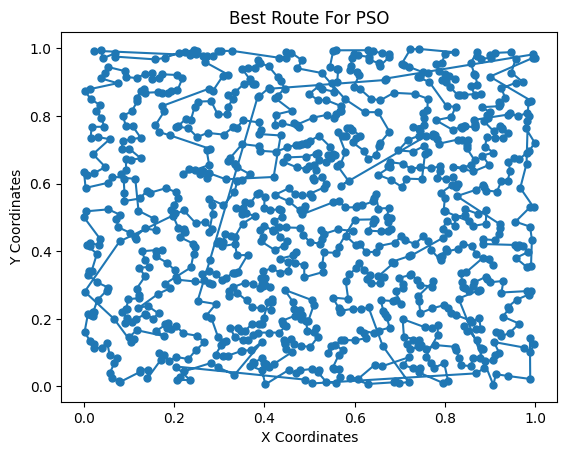

Best route found for PSO: [563, 518, 421, 400, 604, 913, 536, 293, 163, 523, 577, 772, 624, 248, 619, 31, 558, 544, 931, 240, 271, 445, 279, 408, 995, 312, 218, 561, 446, 582, 201, 253, 101, 547, 361, 808, 100, 182, 296, 333, 120, 771, 402, 586, 943, 29, 783, 444, 794, 53, 729, 691, 376, 770, 824, 93, 939, 866, 233, 637, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 369, 413, 167, 680, 470, 777, 852, 412, 653, 727, 535, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 367, 614, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496, 

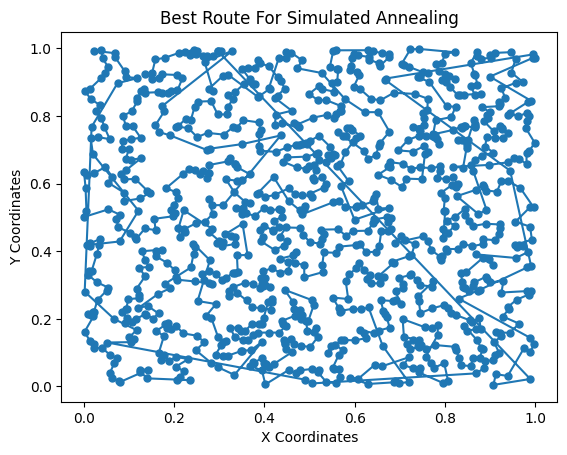

Best route found for Simulated Annealing: [871, 199, 878, 814, 744, 606, 493, 983, 209, 652, 539, 359, 399, 68, 910, 840, 121, 730, 466, 565, 790, 268, 833, 436, 608, 517, 997, 67, 252, 266, 505, 156, 189, 384, 818, 289, 902, 330, 885, 57, 168, 622, 27, 900, 960, 52, 944, 581, 812, 439, 591, 114, 863, 178, 143, 767, 123, 142, 4, 370, 474, 728, 416, 645, 47, 807, 968, 228, 940, 985, 145, 88, 694, 247, 779, 705, 858, 172, 63, 746, 443, 533, 158, 620, 678, 256, 703, 498, 391, 949, 961, 554, 677, 441, 881, 810, 576, 329, 261, 963, 437, 139, 244, 519, 550, 685, 71, 761, 896, 634, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 637, 233, 866, 939, 93, 824, 376, 770, 691, 53, 729, 267, 160, 346, 340, 759, 775, 450, 48, 593, 999, 943, 29, 783, 444, 794, 471, 975, 486, 456, 489, 140, 712, 825, 490, 611, 992, 16, 381, 791, 35, 241, 786, 508, 717, 159, 26, 74, 500, 704, 250, 607, 251, 892, 638, 72, 136, 916, 934, 923, 781, 979, 701, 185, 147, 81, 510, 217, 432, 973, 183, 325, 245, 165, 595,

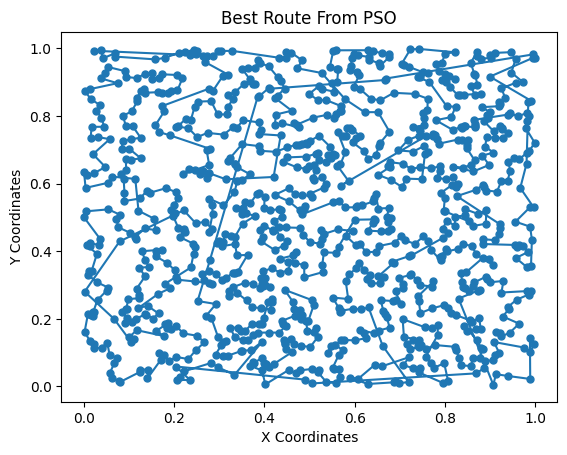

Best route found from PSO: [563, 518, 421, 400, 604, 913, 536, 293, 163, 523, 577, 772, 624, 248, 619, 31, 558, 544, 931, 240, 271, 445, 279, 408, 995, 312, 218, 561, 446, 582, 201, 253, 101, 547, 361, 808, 100, 182, 296, 333, 120, 771, 402, 586, 943, 29, 783, 444, 794, 53, 729, 691, 376, 770, 824, 93, 939, 866, 233, 637, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 369, 413, 167, 680, 470, 777, 852, 412, 653, 727, 535, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 367, 614, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496,

In [4]:
# Plot the best route
xs = [cities[i][0] for i in best_path]
ys = [cities[i][1] for i in best_path]
plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route For PSO')
plt.show()

print("Best route found for PSO:", best_path)
print("Distance of the best route for PSO:", best_distance_with_pso)

print('========================================================================')

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]
plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route For Simulated Annealing')
plt.show()
print("Best route found for Simulated Annealing:", best_route)
print("Distance of the best route for Simulated Annealing:", best_distance)

print('========================================================================')
print('Best route & Distance of the best route')
if(best_distance_with_pso < best_distance):
    # Plot the best route
    xs = [cities[i][0] for i in best_path]
    ys = [cities[i][1] for i in best_path]
    plt.plot(xs, ys, 'o-', markersize=5)
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Best Route From PSO')
    plt.show()

    print("Best route found from PSO:", best_path)
    print("Distance of the best route from PSO:", best_distance_with_pso)

else:
    # Plot the best route
    xs = [cities[i][0] for i in best_route]
    ys = [cities[i][1] for i in best_route]
    plt.plot(xs, ys, 'o-', markersize=5)
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Best Route From Simulated Annealing')
    plt.show()

    print("Best route found from Simulated Annealing:", best_route)
    print("Distance of the best route from Simulated Annealing:", best_distance)